<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [3]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [4]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [5]:
cpp = pd.merge(cell_phones,population, how = 'inner', on=['geo','time'])
cpp.shape

(8590, 4)

In [6]:
cpp.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


**Ding!**

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [7]:
geo_country_codes.columns

gc = geo_country_codes[['geo','country']]

cellphone = pd.merge(cpp,gc)

cellphone.shape



(8590, 5)

In [8]:
cellphone.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
population_total     0
country              0
dtype: int64

**Ding!**

## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [9]:
cellphone['phone_per_person'] = cellphone['cell_phones_total']/cellphone['population_total']
cellphone.set_index('time').loc[2017].reset_index().set_index('country').loc['United States']

time                        2017
geo                          usa
cell_phones_total    3.95881e+08
population_total       324459463
phone_per_person         1.22012
Name: United States, dtype: object

[***Yes yes yes yes yes!***](https://www.youtube.com/watch?v=sq_Fm7qfRQk)

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [10]:
cellphone['geo'] = cellphone['geo'].str.upper()
cellphone.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


***Ding!***

## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [11]:
cellphone.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population_total       int64
country               object
phone_per_person     float64
dtype: object

In [12]:
cellphone.describe(exclude=object)

,time,cell_phones_total,population_total,phone_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [13]:
cellphone.describe(include=object)

,geo,country
count,8590,8590
unique,195,195
top,UGA,Iceland
freq,46,46


***Ding Ding!***

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [15]:
cellphone.set_index('time').loc[2017].sort_values(by='cell_phones_total'
      ,ascending=False).head()


,geo,cell_phones_total,population_total,country,phone_per_person
time,,,,,
2017,CHN,"1,474,097,000.0",1409517397,China,1.0458168186766978
2017,IND,"1,168,902,277.0",1339180127,India,0.8728491809526382
2017,IDN,"458,923,202.0",263991379,Indonesia,1.738402230172827
2017,USA,"395,881,000.0",324459463,United States,1.2201246847283354
2017,BRA,"236,488,548.0",209288278,Brazil,1.1299655683535224


***Ding!***

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [16]:
 """There are a number of ways to do this. I could use a graph that shows the 
 cell phones and population over time. I could make a column that shows cell 
 phones over population and then search when it is greater than one. I have 
 already make this column previously so I'll go with that."""
subset = cellphone.set_index('country').loc['United States']
  
subset.loc[subset['phone_per_person'] > 1]

,geo,time,cell_phones_total,population_total,phone_per_person
country,,,,,
United States,USA,2014,"355,500,000.0",317718779,1.118914031833164
United States,USA,2015,"382,307,000.0",319929162,1.1949739048796058
United States,USA,2016,"395,881,000.0",322179605,1.228758722948959
United States,USA,2017,"395,881,000.0",324459463,1.2201246847283354


'This isnt bad, but I dont want the reader to count the dots in order\nto know which year past 2010 it went over one. I need to figure\nthat out.'

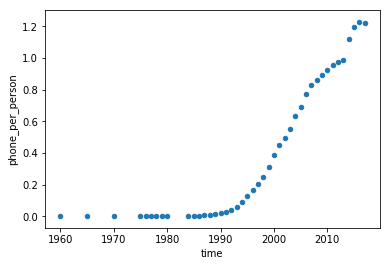

In [17]:
#I'll do it both ways!
subset.plot.scatter(x='time',y='phone_per_person')
'''This isnt bad, but I dont want the reader to count the dots in order
to know which year past 2010 it went over one. I need to figure
that out.'''

## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [18]:
cellphone.head()

,geo,time,cell_phones_total,population_total,country,phone_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [27]:
#gather the chosen countries
piv = cellphone.set_index('country').loc[[
    'China','India','United States','Indonesia','Brazil']].reset_index()

#get to datetime
piv['time'] = pd.to_datetime(piv['time'], format='%Y')

#gather the chosen times
piv = piv.set_index('time').loc['2007-01-01':'2017-01-01'].reset_index()

'''woooo that was tough!!! I knew that had to convert to datetime at some point
during this sprint.''' 
piv.head()


,time,country,geo,cell_phones_total,population_total,phone_per_person
0,2007-01-01,China,CHN,"547,306,000.0",1336800506,0.409414865975522
1,2008-01-01,China,CHN,"641,245,000.0",1344415227,0.4769694564014336
2,2009-01-01,China,CHN,"747,214,000.0",1352068091,0.5526452439590929
3,2010-01-01,China,CHN,"859,003,000.0",1359755102,0.6317336105130495
4,2011-01-01,China,CHN,"986,253,000.0",1367480264,0.7212191838989495


In [20]:

pivot = piv.pivot(columns='time', index='country', values='cell_phones_total' )
pivot

time,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


***Ding!***

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [0]:
#!pip install seaborn --upgrade
#import os
#os.kill(os.getpid(), 9)

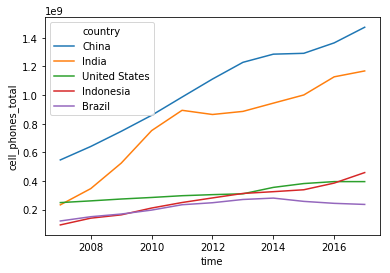

In [25]:
#sounds like a job for a graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='time',y='cell_phones_total',hue='country',data=piv)

I'd say the order is China, India, Indonesia, USA, and then Brazil

In [28]:
pivot['2017-01-01']-pivot['2007-01-01']
#ok, it's India, China, Indonesia, USA, Brazil. 
#At least I got the last one right!
#I can't think of how to order the pivot table to that though
#Also, the second answer is India.

country
Brazil          115,508,445.0
China           926,791,000.0
India           935,282,277.0
Indonesia       365,536,321.0
United States   146,581,000.0
dtype: float64

If you have the time and curiosity, what other questions can you ask and answer with this data?